In [1]:
import pandas as pd
data = pd.read_csv('data/wine.csv')

description=data.columns[1]
mask=data.duplicated()
data_dupl=data[mask]
print(data_dupl.shape[0])  # количество полных дупликатов

data=data.drop_duplicates() # удаляем дупликаты

#data.info()


col_null=(data.isnull().mean()).round(1) # определяем долю пропусков по столбцам

drop_mask=[]
for col in data.columns:
    if col_null[col] >= 0.3:
        drop_mask.append(col)
data=data.drop(drop_mask, axis=1)


for col in data.columns:                # заполянем пропуски
    if data[col].dtype == 'O':
        data[col] = data[col].fillna('unknown')
        #print(col)
    else:
        data[col]=data[col].fillna(-1)




9983


In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('data/wine.csv')

profile = ProfileReport(df, title="Wine Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
import pandas as pd
import sweetviz as sv

df = pd.read_csv('data/wine.csv')

report = sv.analyze(df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
import pandas as pd
import dtale
df = pd.read_csv('data/wine.csv')

d = dtale.show(df)
d

c:\Users\ilia.berdan\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\views.py:725: FutureWarning:

['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [5]:
import pandas as pd
#import sweetviz as sv
import statistics


df = pd.read_csv('data/wine_cleared.csv')

#report = sv.analyze(df)
#report.show_html()

#statistics.median(df['price'])

statistics.mode(df['price'])

df['price'].mode()

df.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


# Нормальное распределение и корреляция Пирсона

2022-12-06 18:50:51,129 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-12-06 18:50:51,155 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-12-06 18:50:51,169 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
C:\Users\ilia.berdan\AppData\Local\Temp\ipykernel_18932\2918490558.py:12: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



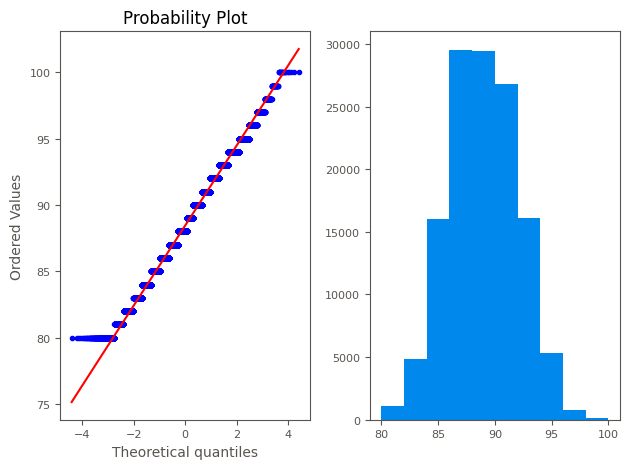

In [6]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика


# Ранговые корреляции

In [7]:
import pandas as pd
#import sweetviz as sv
import statistics


df = pd.read_csv('data/wine_cleared.csv')

df.corr(method='spearman')
df.corr(method='kendall')

from sklearn.metrics import matthews_corrcoef


x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

# Визуализация корреляции

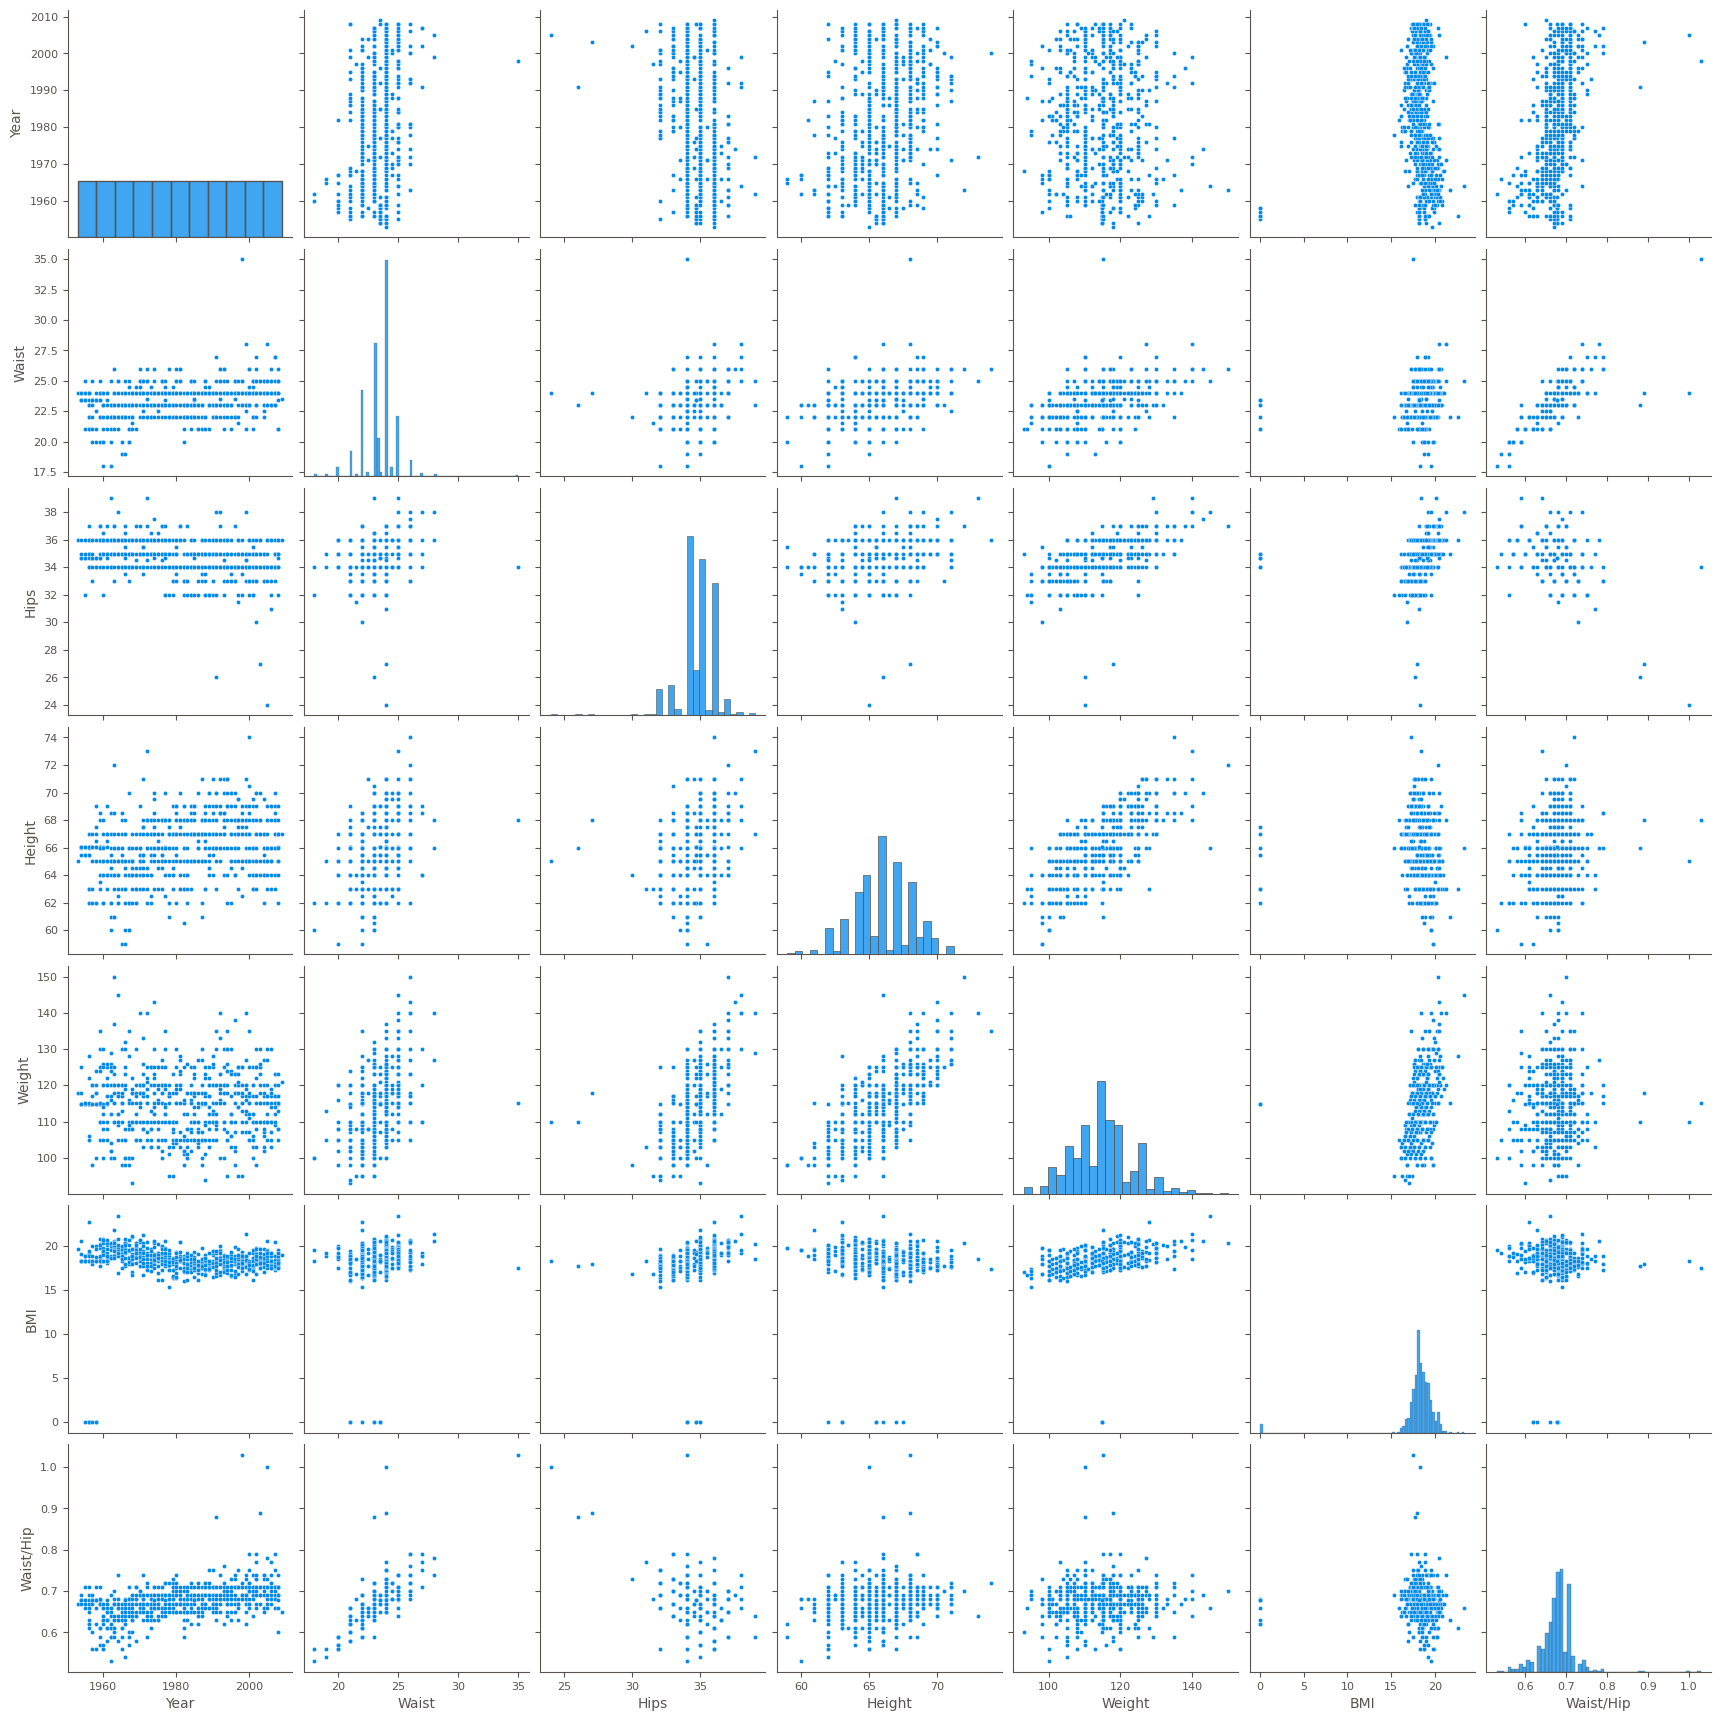

In [8]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('data/model.csv')

#sns.heatmap(data.corr(), annot = True)  # где annot=True указание значений корреляции непосредственно на тепловой карте
#sns.scatterplot(data=data, x="Waist/Hip", y="Waist") # для того чтобы рассмотреть распределение и характер связи используем точечную диаграмму рассеивания

sns.pairplot(data) # комбинация двух вышеупомянутых способов визуализации

#data.corr()

In [9]:
import pandas as pd
import statistics

data = pd.read_csv('data/model.csv')
round(statistics.mean(data['Weight']), 2)
round(statistics.mean(data['Height']), 2)

66.06

# А/В тестирование

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()
''' 
user_id 	идентификатор пользователя, зашедшего на сайт
timestamp 	дата события
group 	группа теста (контрольная или тестовая)
converted 	совершил пользователь целевое действие (нажатие кнопки «добавить в корзину» на сопутствующем товаре) или нет. 1 — да, 0 — нет. 
'''
ab_data.info()

ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d') # Переведем столбец с информацией о дате события в datetime


'''
чтобы получить показатель конверсии в группах на каждый день, нам необходимо предварительно сгруппировать 
наши данные по дате и группе и вычислить количество пользователей, заходивших на сайт, и суммарное количество совершённых целевых действий. 
'''

daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'                                           # для удобства сбросим индекс на сгруппированной таблице c помощью метода reset_index()
}).reset_index().rename(columns={'user_id': 'users_count'})     # и переименуем столбец user_id в users_count с помощью метода rename()
daily_data.head()


#############       Practice        ###############

daily_data['conversion']=daily_data['converted']/daily_data['users_count']*100
group_a=daily_data[daily_data['group']=='A']
answer=group_a[group_a['timestamp']=='2017-01-05']
answer.round(2)
###################################################

display(daily_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


# Визуальный анализ конверсии в группах

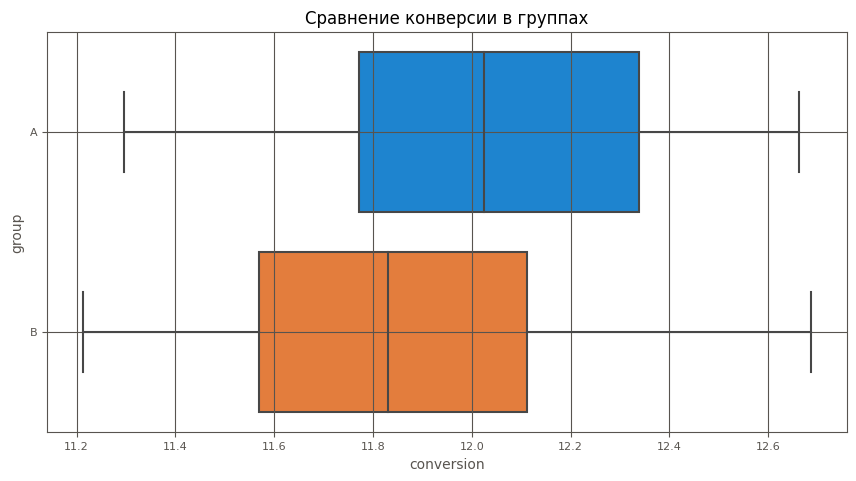

In [11]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [12]:
# вычислим средний и медианный показатель конверсии в контрольной и тестовой группе
# чтобы убедиться, что в данных нет выбросов

conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


# Кумулятивные метрики

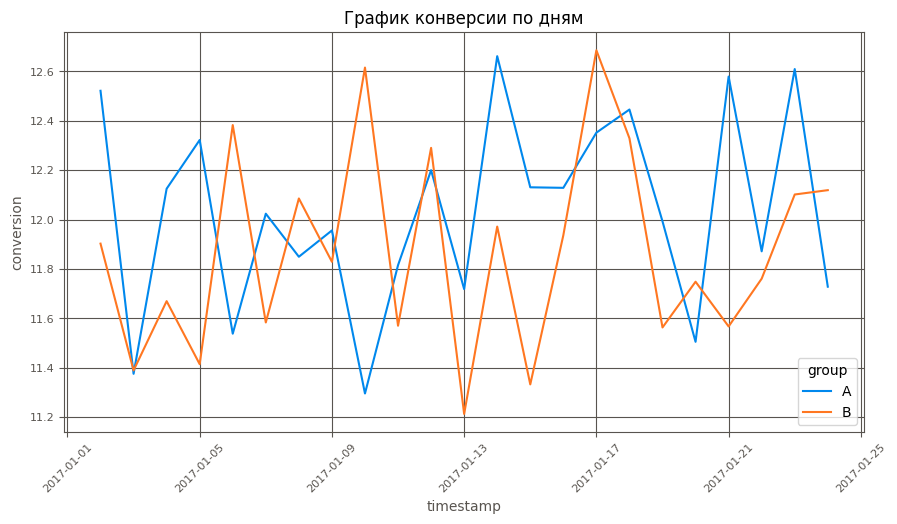

In [13]:
'''
Кумулятивная метрика — это отображение целевой метрики, когда вы отслеживаете её поведение за каждый день — накопленным итогом по дням. 
Кумулятивная метрика считается стабилизированной, когда на графике прекращаются резкие пики и спады показателя, и линия постепенно выравнивается в горизонтальную прямую.
B качестве кумулятивной метрики можно считать не только конверсию, но и выручку, средний чек, количество заказов, процент негативных комментариев, точность модели и так далее.


Важно! Принимать какие-либо решения стоит только после того, как метрика стабилизируется!


'''


# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

Что можно сказать по такому графику? Да практически ничего! Конверсия у обеих групп «скачет» день ото дня. Понять, какая из групп лучше, — практически невыполнимая задача. 

In [122]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())



# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

C:\Users\ilia.berdan\AppData\Local\Temp\ipykernel_18932\1177085822.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


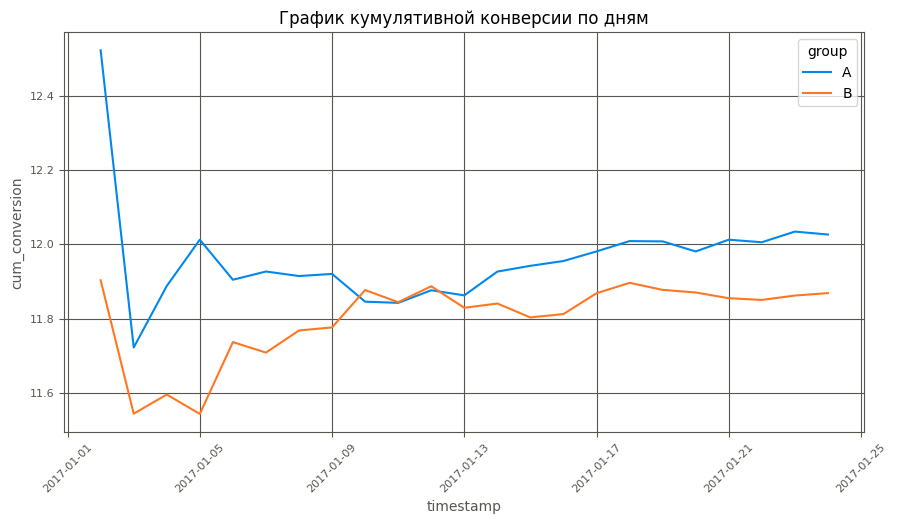

In [15]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

# Практика

In [158]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')


count_a=sample_a.groupby('date').agg({                                  # посчитаем ежедневные: кол-во пользователей, кол-во транзакций, сумму покупок
                                'cid':'count',
                                'transactions':'sum',
                                'revenue':'sum'
                                }).reset_index().rename(columns={       # reset_index() переводит date в название колонок
                                        'cid':'clients_amount',
                                        'revenue':'revenue_sum'
                                }
                                )
count_a['group']='A'


count_b=sample_b.groupby('date').agg({
                                'cid':'count',
                                'transactions':'sum',
                                'revenue':'sum'
                                }).reset_index().rename(columns={
                                        'cid':'clients_amount',
                                        'revenue':'revenue_sum'
                                }
                                )
count_b['group']='B'



,date,clients_amount,transactions,revenue_sum,group
0,2020-11-06,2576,16,1577279,A
1,2020-11-06,2499,19,996645,B
2,2020-11-07,2704,23,1721886,A
3,2020-11-07,2804,19,555499,B
4,2020-11-08,3354,25,846051,A
5,2020-11-08,3291,24,3044842,B
6,2020-11-09,3062,25,1285836,B
7,2020-11-09,3234,18,708830,A
8,2020-11-10,3072,30,2414726,B
9,2020-11-10,3022,29,826984,A


In [166]:
# кумулятивные метрики
cum_a=count_a
cum_b=count_b


cum_a['cum_clients_amount'] = cum_a['clients_amount'].cumsum()
cum_a['cum_transactions'] = cum_a['transactions'].cumsum()
cum_a['cum_revenue_sum'] = cum_a['revenue_sum'].cumsum()

cum_b['cum_clients_amount'] = cum_b['clients_amount'].cumsum()
cum_b['cum_transactions'] = cum_b['transactions'].cumsum()
cum_b['cum_revenue_sum'] = cum_b['revenue_sum'].cumsum()

cum_a['cum_conversion'] = cum_a['cum_transactions']/cum_a['cum_clients_amount'] * 100
cum_b['cum_conversion'] = cum_b['cum_transactions']/cum_b['cum_clients_amount'] * 100

cum_a['cum_mean_transaction'] = cum_a['revenue_sum']/cum_a['cum_transactions']
cum_b['cum_mean_transaction'] = cum_b['revenue_sum']/cum_b['cum_transactions']

#cum_b['cum_conversion'].mean().round(2)        # подсчет средней конверсии  


samp_ab=pd.concat([cum_a,cum_b], axis=0)                              # соединим данные в одну таблицу
samp_ab=samp_ab.sort_values('date').reset_index()
samp_ab=samp_ab.drop('index', axis=1)
samp_ab


,date,clients_amount,transactions,revenue_sum,group,cum_clients_amount,cum_transactions,cum_revenue_sum,cum_conversion,cum_mean_transaction
0,2020-11-06,2576,16,1577279,A,2576,16,1577279,0.621118,98579.937500
1,2020-11-06,2499,19,996645,B,2499,19,996645,0.760304,52455.000000
2,2020-11-07,2704,23,1721886,A,5280,39,3299165,0.738636,44150.923077
3,2020-11-07,2804,19,555499,B,5303,38,1552144,0.716576,14618.394737
4,2020-11-08,3354,25,846051,A,8634,64,4145216,0.741256,13219.546875
5,2020-11-08,3291,24,3044842,B,8594,62,4596986,0.721434,49110.354839
6,2020-11-09,3062,25,1285836,B,11656,87,5882822,0.746397,14779.724138
7,2020-11-09,3234,18,708830,A,11868,82,4854046,0.690934,8644.268293
8,2020-11-10,3072,30,2414726,B,14728,117,8297548,0.794405,20638.683761
9,2020-11-10,3022,29,826984,A,14890,111,5681030,0.745467,7450.306306


2022-12-06 22:44:33,973 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-06 22:44:33,979 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


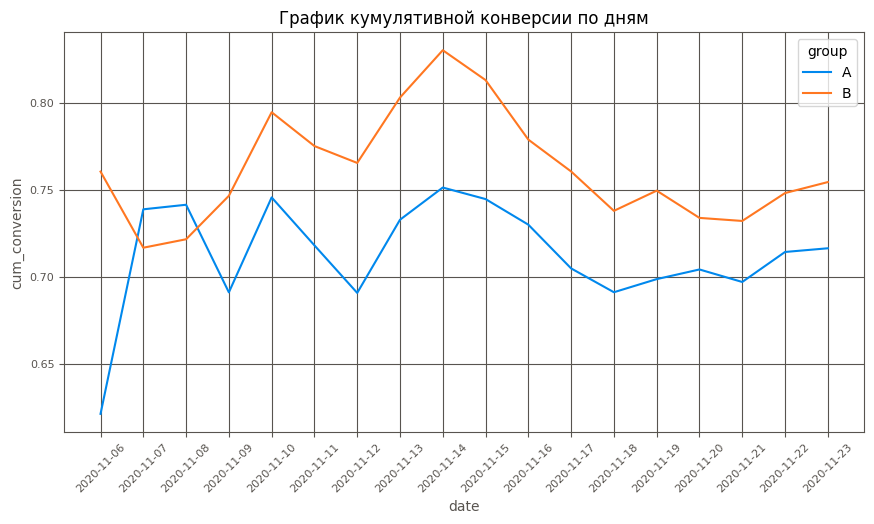

In [168]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=samp_ab, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

2022-12-06 22:45:09,314 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-06 22:45:09,318 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


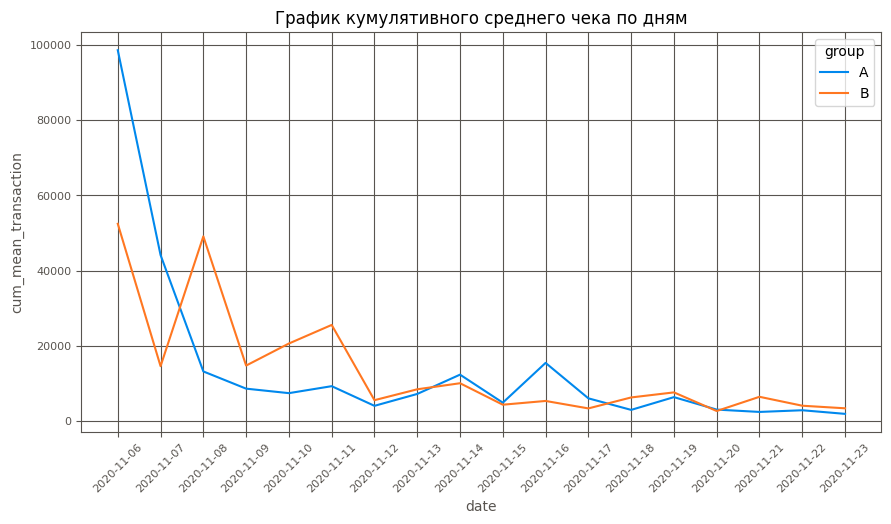

In [169]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивного среднего чека во времени в каждой группе
sns.lineplot(x='date', y='cum_mean_transaction', data=samp_ab, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);